In [2]:
#import statements
import matplotlib.pyplot as plt
import pandas as pd

Utilizing the Marine Mammals Global Species Database spreadsheet, we extract the data from the Marine Mammals and the Country Occurrences tabs for data manipulation. These sheets contain all necessary data for populating the relational database for the project.

In [3]:
#read in data for country occurances and Heirarchy/extinction data
heirarchy_data = pd.read_csv('IUCNHierarchyAndExtinction.csv')
country_data = pd.read_csv('IUCNSpeciesCountryOccurances.csv')

In [4]:
#view of country data for column selection
country_data.head()

,taxonid,assessmentid,recordid,countryoccurrencelookup,countryoccurrencelookup_value,formerlybred,formerlybred_value,origin,origin_value,presence,presence_value,seasonality,seasonality_value
0,1793,7636887,7636947,618,NE Niger,0,NaN,1,Native,1,Extant,0,NaN
1,1793,7636887,7636951,600,GH Ghana,0,NaN,1,Native,1,Extant,0,NaN
2,1793,7636887,7636955,576,AO Angola,0,NaN,1,Native,1,Extant,0,NaN
3,1793,7636887,7636959,583,CM Cameroon,0,NaN,1,Native,1,Extant,0,NaN
4,1793,7636887,7636963,615,NA Namibia,0,NaN,1,Native,1,Extant,0,NaN


In [5]:
#View of heirarchy data for column selection
heirarchy_data.head()

,taxonid,assessmentid,kingdom,phylum,class,order,family,genus,species,infrarank,...,taxonomic_authority,category,criteria,possibly_extinct,possibly_extinct_wild,assessmentdate,assessors,evaluators,contributors,facilitators
0,17026,1306343,ANIMALIA,CHORDATA,MAMMALIA,CARNIVORA,OTARIIDAE,Phocarctos,hookeri,NaN,...,"(Gray, 1844)",EN,A4bd,False,False,18-Nov-14,"Chilvers, B.L.","Goldsworthy, S.D.","Gales, N.J.","Lowry, L., Chiozza, F., Ahonen, H. & Battiston..."
1,22103,9356917,ANIMALIA,CHORDATA,MAMMALIA,SIRENIA,TRICHECHIDAE,Trichechus,manatus,NaN,...,"Linnaeus, 1758",VU,C1,False,False,30-Jun-08,"Deutsch, C.J., Self-Sullivan, C. & Mignucci-Gi...","Reynolds III, J.E. & Powell, J.A. (Sirenia Red...",NaN,NaN
2,10303,43792683,ANIMALIA,CHORDATA,MAMMALIA,SIRENIA,DUGONGIDAE,Hydrodamalis,gigas,NaN,...,"(Zimmermann, 1780)",EX,NaN,False,False,04-Apr-16,"Domning, D.","Morales-Vela, B.",NaN,NaN
3,22102,43793736,ANIMALIA,CHORDATA,MAMMALIA,SIRENIA,TRICHECHIDAE,Trichechus,inunguis,NaN,...,"(Natterer, 1883)",VU,A3cd,False,False,28-Feb-16,"Marmontel, M., de Souza, D. & Kendall, S.","Morales-Vela, B., Castelblanco-Martínez, D.N. ...","Alves dos Santos, G., Carvalho de Carvalho, C....",NaN
4,4162,44199757,ANIMALIA,CHORDATA,MAMMALIA,CETARTIODACTYLA,DELPHINIDAE,Cephalorhynchus,hectori,NaN,...,"(van Beneden, 1881)",EN,A4d,False,False,01-Jul-08,"Reeves, R.R., Dawson, S.M., Jefferson, T.A., K...","Brownell Jr., R.L. & Cooke, J.",NaN,NaN


Next, we filter for only the needed columns from the two datasheets: taxonID, family, genus, species, friendly name, and category for the hierarchy data; and taxonID and country of occurrence from the country data. The columns are renamed to fit the assigned variables in our relational database schema.

In [6]:
#gathering needed data

#heirarchy table containing taxonid, family, genus, species, friendly name, and category and renaming of columns to  database.
heirarchy = heirarchy_data[['taxonid','family','genus', 'species','friendly_name', 'category']]
heirarchy = heirarchy.rename(columns ={'taxonid':'taxonID', 'family':'fName', 'genus': 'gName', 'species': 'sName', 'friendly_name': 'friendlyName'})

#country and taxonid table for relation to species
countryoccurrences = country_data[['taxonid', 'countryoccurrencelookup_value']]
countryoccurrences = countryoccurrences.rename(columns ={'taxonid':'taxonID', 'countryoccurrencelookup_value': 'countryOccurrence'})

In [7]:
#country table information for duplicate and null removal reference
countryoccurrences.info

<bound method DataFrame.info of          taxonID            countryOccurrence
0           1793                     NE Niger
1           1793                     GH Ghana
2           1793                    AO Angola
3           1793                  CM Cameroon
4           1793                   NA Namibia
...          ...                          ...
17820  127826787                SC Seychelles
17821  178756893                ASK-OO Alaska
17822  178756893        RU Russian Federation
17823  178756893                     JP Japan
17824  178756893  US United States of America

[17825 rows x 2 columns]>

Next we will remove all duplicate and null values from the country dataframe.

In [8]:
#removal of duplicates from country data
duplicate_country = countryoccurrences[countryoccurrences.duplicated()]


In [9]:
#drop duplicate rows
countryoccurrences = countryoccurrences.drop_duplicates()

#remove NA values
countryoccurrences.dropna()

,taxonID,countryOccurrence
0,1793,NE Niger
1,1793,GH Ghana
2,1793,AO Angola
3,1793,CM Cameroon
4,1793,NA Namibia
...,...,...
17817,127826787,PH Philippines
17821,178756893,ASK-OO Alaska
17822,178756893,RU Russian Federation
17823,178756893,JP Japan


The removal of duplicates from the country occurrences dataframe reduces the number of rows from 17825 down to 6685.

Countryoccurence and heirarchy dataframes are saved as .csv files to load data into relational database schema in MySQL.

In [10]:
# Save the cleaned dataframes as .csv files for loading into the relational database schema in MySQL
heirarchy.to_csv('heirarchy.csv', index=False)

countryoccurrences.to_csv('countryoccurrences.csv', index=False)

In MySQL, a query was executed to return the counts of endangered species per family. The species, genus, and family tables were joined and filtered to only include those with a category value of CR (Critically Endangered), EN (Endangered), or VU (Vulnerable). The resulting data is converted to a .csv file and then imported back into this notebook for further analysis.

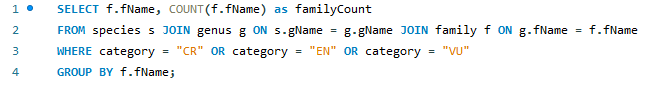

The resulting data is converted to a .csv file and then imported back into this notebook.

In [11]:
#reading in endangered species per family csv file
endangered_species_count = pd.read_csv('endangeredSpeciesPerFamily.csv')
endangered_species_count.head()

,fName,familyCount
0,OTARIIDAE,5
1,BALAENOPTERIDAE,3
2,DELPHINIDAE,8
3,PHOCIDAE,4
4,DUGONGIDAE,1


Values from the dataframes will be used to create a pie chart utilizing the matplotlib package to visualize the distribution of endangered species across different families.

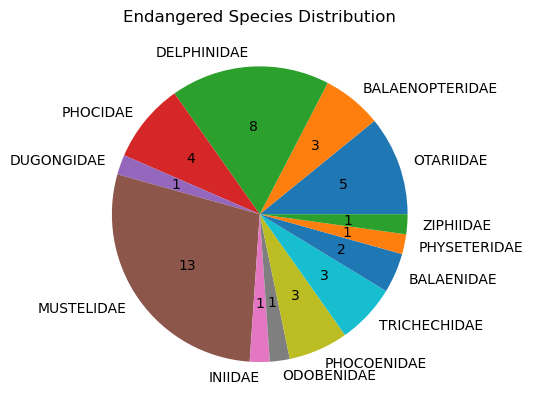

In [12]:
#pulling data from dataframes
family_name = endangered_species_count['fName']

species_count = endangered_species_count['familyCount']

# Plotting the pie chart
plt.pie(species_count, labels=family_name, autopct=lambda percent: round(percent/100*species_count.sum()))

#title
plt.title('Endangered Species Distribution')

# showing plot
plt.show()
